# AR Punks
Using an Auto Encoder to generate new punks from old

In [3]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('default')
from matplotlib.colors import rgb2hex
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import cpunks.cpunks10k as cpunks10k
import cpunks.utils as cputils

In [2]:
cp = cpunks10k.cpunks10k()
(X_train, Y_train), (X_test, Y_test), (labels) = cp.load_data()
X = np.concatenate((X_train, X_test), axis=0)
df = cp.punks_df

In [3]:
from models.AE 
import Autoencoder

In [11]:
AE = Autoencoder(
    input_dim = (24, 24, 4)
    , encoder_conv_filters = [32, 64, 64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,4]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 4
)


In [12]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
INITIAL_EPOCH = 0

In [13]:
AE.compile(LEARNING_RATE)

In [38]:
AE.train(     
    X_train
    , batch_size = BATCH_SIZE
    , epochs = 200
    , initial_epoch = INITIAL_EPOCH
)

Epoch 1/200
282/282 [==============================] - 24s 85ms/step - loss: 0.0070
Epoch 2/200
282/282 [==============================] - 25s 89ms/step - loss: 0.0069
Epoch 3/200
282/282 [==============================] - 26s 92ms/step - loss: 0.0069
Epoch 4/200
282/282 [==============================] - 28s 98ms/step - loss: 0.0068
Epoch 5/200
282/282 [==============================] - 27s 95ms/step - loss: 0.0068
Epoch 6/200
282/282 [==============================] - 28s 99ms/step - loss: 0.0067
Epoch 7/200
282/282 [==============================] - 27s 95ms/step - loss: 0.0067
Epoch 8/200
282/282 [==============================] - 27s 95ms/step - loss: 0.0067
Epoch 9/200
282/282 [==============================] - 27s 96ms/step - loss: 0.0067
Epoch 10/200
282/282 [==============================] - 27s 95ms/step - loss: 0.0066
Epoch 11/200
282/282 [==============================] - 28s 99ms/step - loss: 0.0066
Epoch 12/200
282/282 [==============================] - 26s 93ms/step - lo

282/282 [==============================] - 26s 93ms/step - loss: 0.0042
Epoch 193/200
282/282 [==============================] - 33s 116ms/step - loss: 0.0043
Epoch 194/200
282/282 [==============================] - 41s 144ms/step - loss: 0.0043
Epoch 195/200
282/282 [==============================] - 33s 118ms/step - loss: 0.0043
Epoch 196/200
282/282 [==============================] - 35s 123ms/step - loss: 0.0043
Epoch 197/200
282/282 [==============================] - 29s 103ms/step - loss: 0.0043
Epoch 198/200
282/282 [==============================] - 33s 116ms/step - loss: 0.0043
Epoch 199/200
282/282 [==============================] - 42s 149ms/step - loss: 0.0042
Epoch 200/200
282/282 [==============================] - 29s 104ms/step - loss: 0.0042


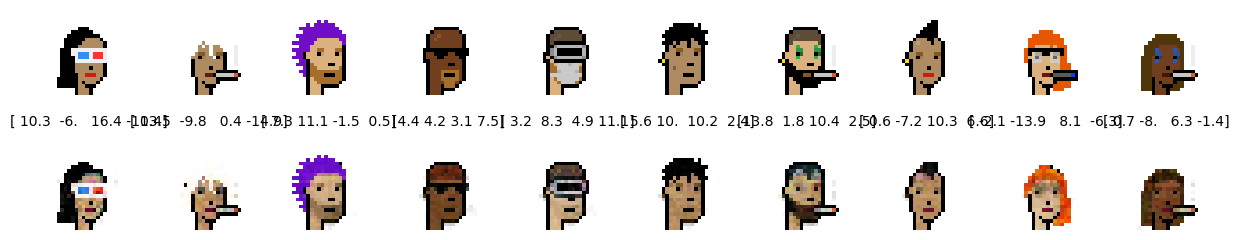

In [40]:
n_to_show = 10
example_idx = np.random.choice(range(len(X_test)), n_to_show)
example_images = X_test[example_idx]

z_points = AE.encoder.predict(example_images)

reconst_images = AE.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i]#.squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)   
    ax.imshow(img)

for i in range(n_to_show):
    img = reconst_images[i]#.squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img)

In [16]:
(example_images.shape, reconst_images.shape)

((10, 24, 24, 4), (10, 24, 24, 4))

In [42]:
#reconst_images = AE.decoder.predict(z_points)
z_points

array([[ 10.318158  ,  -5.964894  ,  16.354687  , -10.41891   ],
       [ 13.514522  ,  -9.778457  ,   0.4327299 , -14.878045  ],
       [  7.305446  ,  11.132518  ,  -1.499598  ,   0.5388608 ],
       [  4.375748  ,   4.15585   ,   3.1159039 ,   7.5234327 ],
       [  3.2256737 ,   8.268521  ,   4.8753166 ,  11.118655  ],
       [  5.6386766 ,  10.018771  ,  10.212768  ,   2.3754513 ],
       [ 13.812485  ,   1.8144655 ,  10.363796  ,   2.5404963 ],
       [  0.55798763,  -7.166137  ,  10.250754  ,   6.591733  ],
       [ -2.0632489 , -13.936109  ,   8.093224  ,  -6.3153596 ],
       [  0.7258133 ,  -7.9882064 ,   6.2672935 ,  -1.4329224 ]],
      dtype=float32)

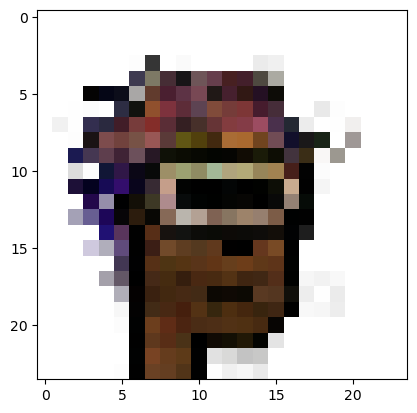

In [57]:
z_s = np.array([[0.0  ,  10.0, 0.0, 1.0]])
reconst_images = AE.decoder.predict(z_s)
plt.imshow(reconst_images[0])

In [6]:
from keras.datasets import mnist
(mnist_x_train, mnist_y_train), (mnist_x_test, minst_y_test) = mnist.load_data()

In [11]:
#type(mnist_x_train[0][0][0])
mnist_x_train.shape

(60000, 28, 28)